In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")

### Reading the Input files

In [125]:
companies = pd.read_csv("./data/companies.txt", sep="\t", encoding = "unicode_escape")
rounds2 = pd.read_csv("./data/rounds2.csv",encoding='unicode_escape')
mapping = pd.read_csv("./data/mapping.csv", encoding = "unicode_escape")

### Primary key is permalink & Converting It to Lower Case

In [126]:
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower()

### Identifying unique companies from round2 file

In [149]:
uniq_rounds2=len(rounds2["company_permalink"].unique())
uniq_rounds2

66370

### Identifying unique companies from compaines file

In [150]:
uniq_companies=len(companies.permalink.unique())
uniq_companies

66368

### Merging the two data frames from companies and round2 data.

In [129]:
master_frame=pd.merge(rounds2,companies,how="left",left_on="company_permalink",right_on="permalink")

In [130]:
master_frame.shape

(114949, 16)

In [131]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114942 non-null  object 
 7   name                     114941 non-null  object 
 8   homepage_url             108810 non-null  object 
 9   category_list            111535 non-null  object 
 10  status                   114942 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

### Cleaning The Data

In [132]:
# The Total missing values count from Column Wise

In [133]:
master_frame.isnull()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
114945,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
114946,False,False,False,False,False,True,False,False,False,True,False,True,True,True,True,False
114947,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [134]:
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      7
name                           8
homepage_url                6139
category_list               3414
status                         7
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20527
dtype: int64

In [135]:
# Missing Values Through The Column as % of total number of values

In [136]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

In [137]:
## For Column Wise Analysis "raised_amount_usd" is the main craiteria 
## Null Values In this field can be deleted or can be imputed
## I Decided to remove these values as it is having only 17% of data.

In [138]:
master_frame['raised_amount_usd'].isnull().sum()

19990

In [139]:
master_frame=master_frame[~master_frame.raised_amount_usd.isnull()]

In [140]:
master_frame['raised_amount_usd'].isnull().sum()

0

In [141]:
master_frame.shape

(94959, 16)

In [143]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         70.34
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                4.56
category_list               1.10
status                      0.00
country_code                6.16
state_code                  8.01
region                      7.42
city                        7.42
founded_at                 16.81
dtype: float64

In [142]:
### Further, the missing data columns of 'funding_round_code', 'founded_at', 'homepage_url' 
### which are 72.91.4%,17.86% and 5.34% of data are not required for this analysis. Hense, droping these columns.
### On the other hand the columns, country_code and category_list are needed for the analysis. 
### Therefore removing rows with null or empty value in these columns.

In [17]:
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)

In [144]:
master_frame=master_frame[~master_frame.country_code.isnull()]

In [145]:
master_frame=master_frame[~master_frame.category_list.isnull()]

In [146]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         69.75
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                3.67
category_list               0.00
status                      0.00
country_code                0.00
state_code                  1.96
region                      1.34
city                        1.33
founded_at                 15.10
dtype: float64

In [ ]:
### Ignoring remaining null values because the are very low percent which can't effect our analysis. 

## Funding Type Analysis Working With Master Frame

In [147]:
## There are Four Types Of Investment Types they are SEED, ANGEL, VENTURE and PRIVATE EQUITY
## Identifying which investment type is best suitable Spark Funds As specified, Spark Fund will choose the best one among the four.

In [148]:
master_frame['funding_round_type'].unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [ ]:
### Through UNIQUE function 14 unique investment types are identified. 
### As we know Spark Fund is ready to invest 5M to 15M per round. 
### Next step is to filter rows with funding_round_type in seed,angel,venture and private_equity. 

In [24]:
master_frame=master_frame[master_frame['funding_round_type'].isin(['seed','angel','venture','private_equity'])]

In [25]:
# Applying mean function to get the average funding raised for each funding types
master_by_fundtype = master_frame.groupby('funding_round_type')
master_by_fundtype['raised_amount_usd'].mean().sort_values(ascending = False)

funding_round_type
private_equity    7.393849e+07
venture           1.172422e+07
angel             9.715739e+05
seed              7.477937e+05
Name: raised_amount_usd, dtype: float64

In [ ]:
## It shows that Venture type of investment is the best investment type. 

# County Analysis

In [26]:
## Next filtering only VENTURE type from the data.

In [27]:
venture_df = master_frame[master_frame["funding_round_type"]=="venture"]

In [28]:
venture_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52024 entries, 0 to 114941
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   company_permalink        52024 non-null  object 
 1   funding_round_permalink  52024 non-null  object 
 2   funding_round_type       52024 non-null  object 
 3   funded_at                52024 non-null  object 
 4   raised_amount_usd        47809 non-null  float64
 5   permalink                52024 non-null  object 
 6   name                     52024 non-null  object 
 7   category_list            52024 non-null  object 
 8   status                   52024 non-null  object 
 9   country_code             52024 non-null  object 
 10  state_code               51125 non-null  object 
 11  region                   51354 non-null  object 
 12  city                     51354 non-null  object 
dtypes: float64(1), object(12)
memory usage: 5.6+ MB


In [152]:
venture_df.shape

(52024, 13)

In [ ]:
## Identifying the final 9 counties which have hieghest funding
## Aggregation of the raised amount in each country can solve the identification.

In [30]:
venture_by_country = venture_df.groupby('country_code')
venture_by_country['raised_amount_usd'].sum().sort_values(ascending=False).head(9)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64

In [154]:
## Only 9 counties data is filtered.

In [155]:
top9 = venture_df[venture_df['country_code'].isin(["USA","CHN","GBR","IND","CAN","FRA","ISR","DEU","JPN"])]

In [156]:
## Identifying the row's no category and removing for the next step.

In [157]:
top9=top9[~top9.category_list.isnull()]

In [ ]:
## Sub secctors are seperated by PIPE (|) the vertical bar in category lists of some companies.
## Example : category_list contanis "Application Platforms|Real Time|Social Network.." 
IN this senario the first one "APPLICATION PLATFORMS" considered as primary sector.
Creating a new column primary_sector to store this information in the Dataframe.


In [38]:
top9['primary_sector'] =top9['category_list'].astype(str).apply(lambda x: x.split('|')[0])
top9.shape


(47614, 14)

In [45]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list,status,country_code,state_code,region,city,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,Application Platforms
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web
5,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN,/organization/004-technologies,004 Technologies,Software,operating,USA,IL,"Springfield, Illinois",Champaign,Software
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology


# Sector Analysis

In [46]:
## From the mapping dataframe it is best to remove null values.

In [54]:
mapping=mapping[~mapping.category_list.isnull()]
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [55]:
### Correction of Category list of mapping file using manual function

In [56]:
def correctMapping0(category):
## Correction of Mapping Data. 
## In the Category_Class column the 'na' is misprinded as '0'
    if '0' in category:
        if category.startswith("0"):    # Handle 0notechnology case with capital Na
            return category[:category.find('0')]+'Na'+category[category.find('0')+1:]
        elif category.endswith("0"):    # ignores the 2.0 case with 0 at the end of the string
            return category
        else:
            return category[:category.find('0')]+'na'+category[category.find('0')+1:]
    else:
        return category

In [57]:
# Correction of category_list column in the mapping.
mapping['category_list']=list(map(correctMapping0,mapping['category_list']))

In [60]:
## Mapping the category_list in the top9 dataframe to the main_sector in the mapping file. 
## Before merging these two dataframe, creating a new column main_sector in mapping dataframe to get 
## the main sector name of each category.

In [61]:
m=pd.melt(mapping, id_vars=['category_list'], var_name=['main_sector'])
m=m[m.value==1]
m=m.drop('value',axis=1)
m.shape

(687, 2)

In [62]:
top9=pd.merge(top9,m,how="left",left_on="primary_sector",right_on="category_list")

In [63]:
top9=top9.drop('category_list_y',axis=1)

In [64]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,Application Platforms,"News, Search and Messaging"
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,"News, Search and Messaging"
3,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN,/organization/004-technologies,004 Technologies,Software,operating,USA,IL,"Springfield, Illinois",Champaign,Software,Others
4,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Cleantech / Semiconductors


In [66]:
top9.shape

(47614, 15)

In [67]:
top9['main_sector'].head()

0                 Entertainment
1    News, Search and Messaging
2    News, Search and Messaging
3                        Others
4    Cleantech / Semiconductors
Name: main_sector, dtype: object

In [ ]:
## Identifying the null in the main_sector.

In [68]:
len(top9[top9['main_sector'].isnull()])

11

In [69]:
## Removing the invalid 12 rows,

In [70]:
top9=top9[~(top9['main_sector'].isnull())]

In [71]:
len(top9[top9['main_sector'].isnull()])

0

In [72]:
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,category_list_x,status,country_code,state_code,region,city,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/organization/-fame,#fame,Media,operating,IND,16,Mumbai,Mumbai,Media,Entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,Application Platforms,"News, Search and Messaging"
2,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,Curated Web,"News, Search and Messaging"
3,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,NaN,/organization/004-technologies,004 Technologies,Software,operating,USA,IL,"Springfield, Illinois",Champaign,Software,Others
4,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Biotechnology,Cleantech / Semiconductors


In [ ]:
## D1 is for USA, D2 is for GBR (UK), D3 is for IND. 
## Identifying the venture comes within the 5-15 million USD range.

# Sector Analysis - USA

In [73]:
D1=top9[top9['country_code']=='USA']

In [74]:
D1 = D1[(D1['raised_amount_usd'] >= 5000000) & (D1['raised_amount_usd'] <= 15000000)]

In [ ]:
## Total amount raised in D1

In [75]:
D1.raised_amount_usd.sum()

107757097294.0

In [76]:
D1.raised_amount_usd.count()

12063

In [77]:
D1.shape

(12063, 15)

In [ ]:
## Finding top sectors in D1

In [78]:
D1_by_sector=D1.groupby('main_sector')

In [79]:
D1_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Name: raised_amount_usd, dtype: int64

In [80]:
D1_by_sector['raised_amount_usd'].sum().sort_values(ascending = False).head()

main_sector
Others                                     2.632101e+10
Social, Finance, Analytics, Advertising    2.380738e+10
Cleantech / Semiconductors                 2.163343e+10
News, Search and Messaging                 1.397157e+10
Health                                     8.211859e+09
Name: raised_amount_usd, dtype: float64

In [ ]:
## Identifying the highest invested company among the 1st Top sectors of the country.

In [81]:
D1[D1['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                        
Others       /organization/virtustream            64300000.0
             /organization/capella                54968051.0
             /organization/airtight-networks      54201907.0
             /organization/decarta                52100000.0
             /organization/black-duck-software    51000000.0
Name: raised_amount_usd, dtype: float64

In [ ]:
## Identifying the highest invested company among the 2nd Top sectors of the country.

In [82]:
D1[D1['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                
Social, Finance, Analytics, Advertising  /organization/shotspotter    67933006.0
                                         /organization/demandbase     63000000.0
                                         /organization/intacct        61800000.0
                                         /organization/netbase        60600000.0
                                         /organization/lotame         59700000.0
Name: raised_amount_usd, dtype: float64

# Sector Analysis - GBR (UK)

In [ ]:
## Formation of Data frame D2 for country GBR

In [83]:
D2=top9[top9['country_code']=='GBR']
D2 = D2[(D2['raised_amount_usd'] >= 5000000) & (D2['raised_amount_usd'] <= 15000000)]
D2_by_sector=D2.groupby('main_sector')

In [ ]:
## Identifying the top sectors with the highest number of investments in D2.

In [84]:
D2_by_sector['raised_amount_usd'].count().sort_values(ascending = False).head()

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Name: raised_amount_usd, dtype: int64

In [85]:
D2_by_sector['raised_amount_usd'].sum().sort_values(ascending = False)

main_sector
Others                                     1.283624e+09
Cleantech / Semiconductors                 1.163990e+09
Social, Finance, Analytics, Advertising    1.089404e+09
News, Search and Messaging                 6.157462e+08
Entertainment                              4.827847e+08
Manufacturing                              3.619403e+08
Health                                     2.145375e+08
Automotive & Sports                        1.670516e+08
Name: raised_amount_usd, dtype: float64

In [ ]:
## Total amount raised in D2

In [86]:
D2.raised_amount_usd.sum()

5379078691.0

In [87]:
D2.raised_amount_usd.count()

621

In [88]:
D2.shape

(621, 15)

In [ ]:
## Identifying the highest invested company among the 1st Top sectors of the country.

In [89]:
D2[D2['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                            
Others       /organization/electric-cloud             37000000.0
             /organization/sensage                    36250000.0
             /organization/enigmatic                  32500000.0
             /organization/silverrail-technologies    29000000.0
             /organization/opencloud                  27972766.0
Name: raised_amount_usd, dtype: float64

In [ ]:
## Identifying the highest invested company among the 2nd Top sectors of the country.

In [92]:
D2[D2['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                          
Social, Finance, Analytics, Advertising  /organization/celltick-technologies    37500000.0
                                         /organization/mythings                 34000000.0
                                         /organization/zopa                     32900000.0
                                         /organization/imagini                  28550000.0
                                         /organization/marketinvoice            25553007.0
Name: raised_amount_usd, dtype: float64

# Sector Analysis - India

In [93]:
## Formation of Data frame D3

In [94]:
D3=top9[top9['country_code']=='IND']
D3 = D3[(D3['raised_amount_usd'] >= 5000000) & (D3['raised_amount_usd'] <= 15000000)]
D3_by_sector=D3.groupby('main_sector')

In [ ]:
## Identifying the top sectors with the highest number of investments in D3.

In [95]:
D3_by_sector['raised_amount_usd'].count().sort_values(ascending = False)

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Cleantech / Semiconductors                  20
Health                                      19
Automotive & Sports                         13
Name: raised_amount_usd, dtype: int64

In [96]:
D3.shape

(328, 15)

In [ ]:
## Total amount raised in D3

In [97]:
D3.raised_amount_usd.sum()

2949543602.0

In [98]:
D3.raised_amount_usd.count()

328

In [ ]:
### Identifying the highest invested company among the 1st Top sectors of the country.

In [99]:
D3[D3['main_sector']=='Others'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector  permalink                     
Others       /organization/firstcry-com        39000000.0
             /organization/myntra              38000000.0
             /organization/commonfloor         32900000.0
             /organization/pepperfry-com       28000000.0
             /organization/itzcash-card-ltd    25000000.0
Name: raised_amount_usd, dtype: float64

In [100]:
### Identifying the highest invested company among the 2nd Top sectors of the country.

In [101]:
D3[D3['main_sector']=='Social, Finance, Analytics, Advertising'].groupby(['main_sector','permalink']).raised_amount_usd.sum().sort_values(ascending=False).head()

main_sector                              permalink                               
Social, Finance, Analytics, Advertising  /organization/manthan-systems               50700000.0
                                         /organization/komli-media                   28000000.0
                                         /organization/shopclues-com                 25000000.0
                                         /organization/intarvo                       21900000.0
                                         /organization/grameen-financial-services    21556050.0
Name: raised_amount_usd, dtype: float64

# Checkpoint 6: Plots

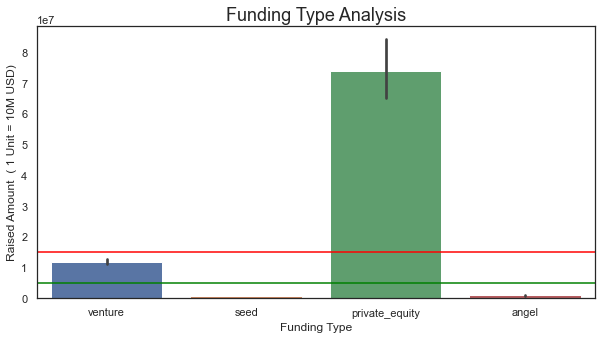

In [104]:
# BAR Plot with default statistic=mean
plt.figure(figsize=(10,5))
g=sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame)
#g.set_ylim(0, 20000000)
#g.set_yscale('log')
g.set(xlabel='Funding Type', ylabel='Raised Amount  ( 1 Unit = 10M USD)')
g.set_title('Funding Type Analysis',fontsize =18)

plt.axhline(5000000, color='green')
plt.axhline(15000000, color='red')


plt.show()

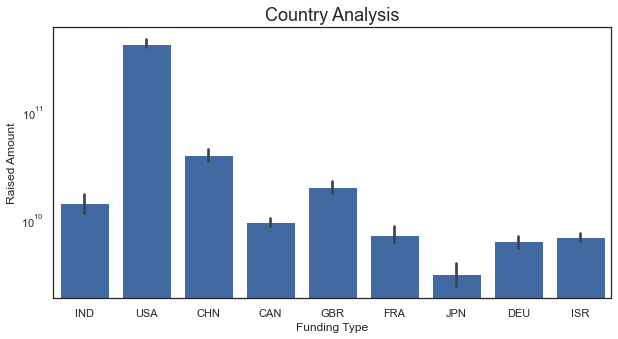

In [105]:
# BAR Plot with default statistic=mean
plt.figure(figsize=(10,5))
c=sns.barplot(x='country_code', y='raised_amount_usd', data=top9, estimator=np.sum,color=(0.2, 0.4, 0.7, 0.6))
#c.set_ylim(0, 100000000000)
c.set_yscale('log')
c.set(xlabel='Funding Type', ylabel='Raised Amount')
c.set_title('Country Analysis',fontsize =18)
plt.show()

In [106]:
## A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type i.e venture)

## For this plot creating a master dataframe with all the data for the top 3 sectors of the top 3 countries.


In [107]:
master_D=D1[D1['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])]

In [108]:
master_D.shape

(8014, 15)

In [109]:
master_D=master_D.append(D2[D2['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','Cleantech / Semiconductors'])], ignore_index=True)

In [110]:
master_D.shape

(8424, 15)

In [111]:
master_D=master_D.append(D3[D3['main_sector'].isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])], ignore_index=True)

In [112]:
master_D.shape

(8646, 15)

In [113]:
## Using the master_D to plot the sector wise investment count of the top 3 sectors of the top3 countries.

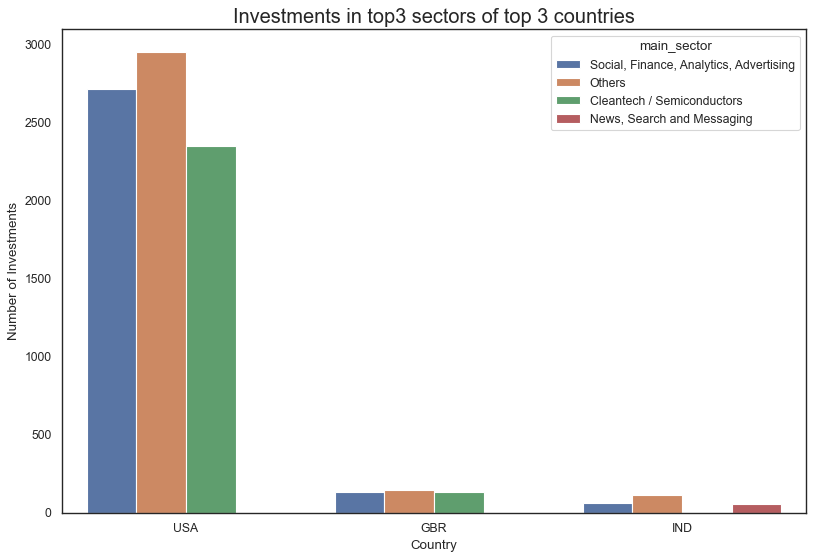

In [114]:
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
# specify hue="categorical_variable"
s=sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=master_D,estimator=lambda x: len(x))
s.set(xlabel='Country', ylabel='Number of Investments')
s.set_title('Investments in top3 sectors of top 3 countries',fontsize =18)
plt.show()